# 1. 3SUM

In [372]:
import numpy as np
import heapq

In [49]:
def threesum(nums):
    nums.sort()
    same = False
    res = []
    for i in range(len(nums)-2):
        if same:
            same = nums[i] == nums[i+1]
            continue
        same = nums[i] == nums[i+1]
        l, r = i+1, len(nums)-1
        while l < r:
            sum = nums[i] + nums[l] + nums[r]
            if sum == 0:
                res.append([nums[i],nums[l],nums[r]])
                r -= 1
                while nums[r] == nums[r+1] and r > l:
                    r-= 1
            elif sum > 0:
                r -= 1
            elif sum < 0:
                l+= 1

    return res

# three = 0 
# i = 0 
# while three < 5:
#     i+= 1
#     np.random.seed = i
#     arr = np.random.randint(-10,10,size = 7).tolist()
#     three = len(threesum(arr))

# print(i, threesum(arr))

arr = [-7,-7,-7, -5, -4, 1, 3, 4, 4]

threesum(arr)



[[-7, 3, 4], [-5, 1, 4], [-4, 1, 3]]

# 31. Unique Binary Search Trees

In [50]:
def nums_unique_BST(num : int):

    memo = [1]*(num + 1)

    for i in range(2,num+1):
        sum = 0
        for j in range(1,i+1):
            sum += memo[j-1]*memo[i-j]
        memo[i] = sum

    return memo[-1]

In [53]:
for k in range(1,6):
    print(nums_unique_BST(k))

1
2
5
14
42


# 32. Siral Matrix

In [91]:
class Matrix:
    def __init__(self,n,m) -> list[list[int]]:
        self.matrix = [[1 + i + m*j for i in range(m)] for j in range(n)]
        
    def __repr__(self):
        rows = []
        for row in self.matrix:
            row_str = ""
            for item in row:
                row_str += str(item).ljust(4)  # Adjust the padding as needed
            rows.append(row_str)
        return "\n".join(rows)


In [100]:
def SpiralMatrtix(matrix):
    n,m = len(matrix),len(matrix[0])
    left, right = 0,m
    top, bottom = 0,n
    res = []
    while top < bottom  and left < right:

        for i in range(left,right):
            res.append(matrix[top][i])
        top += 1

        for i in range(top,bottom):
            res.append(matrix[i][right-1])
        right -= 1

        if not (top < bottom and left < right):
            break

        for i in range(right-1,left,-1):
            res.append(matrix[bottom-1][i])
        bottom -= 1

        for i in range(bottom,top-1,-1):
            res.append(matrix[i][left])
        left += 1

    return res

SpiralMatrtix(Matrix(4,2).matrix)

[1, 2, 4, 6, 8, 7, 5, 3]

In [96]:
Matrix(4,2)

1   2   
3   4   
5   6   
7   8   

In [114]:
def CreateSpiral(n,m):
    arr = [i+1 for i in range(n*m)]
    matrix = Matrix(n,m).matrix

    left, right = 0,m
    top, bottom = 0,n
    k = 0
    
    while top < bottom  and left < right:

        for i in range(left,right):
            matrix[top][i] = arr[k]
            k+=1
        top += 1

        for i in range(top,bottom):
            matrix[i][right-1] = arr[k]
            k+=1
        right -= 1

        if not (top < bottom and left < right):
            break

        for i in range(right-1,left,-1):
            matrix[bottom-1][i] = arr[k]
            k += 1
        bottom -= 1

        for i in range(bottom,top-1,-1):
            matrix[i][left] = arr[k]
            k += 1
        left += 1

    return matrix


SpiralMatrtix(CreateSpiral(8,2))


objet = Matrix(1,1)
objet.matrix = CreateSpiral(8,2)
print(objet)
    

1   2   
16  3   
15  4   
14  5   
13  6   
12  7   
11  8   
10  9   


# 33. Product of array except self

In [119]:
def ProductExceptSelf(nums):
    n = len(nums)
    output = [1] * n

    prefixe = 1
    for i in range(n):
        output[i] *= prefixe
        prefixe *= nums[i]

    suffixe = 1
    for i in range(n-1,-1,-1):
        output[i] *= suffixe
        suffixe *= nums[i]

    return output

ProductExceptSelf([i for i in range(1,5)])



[24, 12, 8, 6]

# 34. Merge Intervals

In [121]:
def merge(intervals):

    intervals.sort(key = lambda x : x[0])
    output = [intervals[0]]

    for start, end in intervals:
        LastEnd = output[-1][1]

        if start <= LastEnd:
            output[-1][1] = max(LastEnd,end)

        else:
            output.append([start,end])
    return output

    
exemple = [[1,3],[2,6],[8,10],[15,18]]

merge(exemple)

[[1, 6], [8, 10], [15, 18]]

# 35. House Robber II

In [126]:
def HouseRobberCircular(houses):

    def HelperFunction(nums):
        if len(nums) == 0:
            return 0
        
        prev, next = 0, nums[0]

        for ele in nums[1:]:

            case1 = prev + ele
            case2 = next

            prev,next  = next, max(case1,case2)

        return next
    
    return max(HelperFunction(houses[:-1]),HelperFunction(houses[1:]))



arr = [2,3,2,4,5,1,12]

HouseRobberCircular(arr)

20

# 36. Remove Nth node from end of the list

In [ ]:
class ListNode:
    def __init__(self, value=0, next=None):
        self.value = value
        self.next = next
    
    def __str__(self):
        current = self
        result = ""
        while current:
            result += str(current.value)
            if current.next:
                result += " -> "
            current = current.next
        return result
    


def remove_n_node_from_end(head : ListNode, n):
    dummy = ListNode(0,head)
    left = dummy
    right = head

    while n > 0 and right:
        right = right.next
        n -= 1

    while right:
        right = right.next
        left = left.next
    
    left.next = left.next.next

    return dummy.next

# Creating linked list: 1 -> 2 -> 3 -> 4 -> None
node6 = ListNode(6)
node5 = ListNode(5, node6)
node4 = ListNode(4, node5)
node3 = ListNode(3, node4)
node2 = ListNode(2, node3)
node1 = ListNode(1, node2)


print("Before Modification: " ,node1)
modified_list = remove_n_node_from_end(node1, 3)
print("Modified list:       ", modified_list)

# 37. Copy list with random pointer

In [ ]:
# def copyRandomList(head):
#     oldToNew = {None : None}

#     cur  = head
#     while cur :
#         oldToNew[cur] =  ListNode(cur.value)
#         cur = cur.next

#     cur = head 
#     while cur:
#         oldToNew[cur].next = oldToNew[cur.next]
#         oldToNew[cur].random = oldToNew[cur.random]
#         cur = cur.next

#     return oldToNew[head]
        


# 38. Maximal Square

In [59]:
def MaximalSquare(matrix):
    
    row , col = len(matrix), len(matrix[0])

    record = {}
    maximal = 0

    def dfs(r,c):
        nonlocal maximal
        if r >= row or c >= col:
            return 0
        if (r,c) not in record:
            right = dfs(r,c+1)
            down  = dfs(r+1,c)
            diag  = dfs(r+1,c+1)

            record[(r,c)] = 0

            if matrix[r][c] == "1":
                record[(r,c)] = 1 + min(right,down,diag)
                maximal = max(maximal, record[(r,c)])
                
        return record[(r,c)]
    dfs(0,0)
    return maximal


In [52]:
import random
def generate_random_matrix(m, n):
    matrix = []
    for _ in range(m):
        row = [random.choice(["0", "1"]) for _ in range(n)]
        matrix.append(row)
    return matrix

# Example usage
m = 5  # Number of rows
n = 8  # Number of columns

random_matrix = generate_random_matrix(m, n)

# Print the generated matrix
for row in random_matrix:
    print(" ".join(row))

1 0 0 1 1 1 1 1
0 0 1 1 0 1 1 1
0 1 0 0 0 0 0 0
0 0 1 0 1 0 1 0
0 1 0 1 1 0 1 0


In [60]:
while MaximalSquare(random_matrix) < 4:
    random_matrix = generate_random_matrix(m, n)

# Print the generated matrix
for row in random_matrix:
    print(" ".join(row))

1 0 0 0 0 0 0 0
1 1 1 1 1 1 0 1
0 0 1 1 1 1 0 1
0 1 1 1 1 1 0 1
0 0 1 1 1 1 0 0


# 39. Decode Ways

In [105]:
def DecodeWays(s):
    dp = { len(s) : 1}

    # This return the number of different ways to decode starting at index i
    def dfs(i):
        if i in dp:
            return dp[i]
        
        res = dfs(i+1)
        if s[i] == '0':
            dp[i] == 0

        elif i+1 < len(s) and int(s[i] + s[i+1]) in range(1,27):
            res += dfs(i+2)

        dp[i] = res
        return dp[i]
    return dfs(0)

DecodeWays("1213")

5

In [106]:
def ListDecodeWays(s):
    res = []
    stack = []
    def dfs(i):

        if i == len(s):
            res.append(stack[:])
            return

        if s[i] == "0":
            return
        
        elif s[i] != "0":
            stack.append(s[i])
            dfs(i+1)
            stack.pop()
            
            if i + 1 < len(s) and int(s[i] + s[i+1]) in range(1,26):
                stack.append(s[i]+s[i+1])
                dfs(i+2)
                stack.pop()
        return
    
    dfs(0)
    return res

ListDecodeWays("121")

[['1', '2', '1'], ['1', '21'], ['12', '1']]

In [102]:
# Create the mapping dictionary
int_to_char = {f'{i}': chr(64 + i) for i in range(1, 27)}

print([''.join([int_to_char[ele] for ele in decode]) for decode in  ListDecodeWays("121323")])

['ABACBC', 'ABACW', 'ABMBC', 'ABMW', 'AUCBC', 'AUCW', 'LACBC', 'LACW', 'LMBC', 'LMW']


# 40. Unique Paths

In [107]:
def UniquePaths(m,n):

    row = [1] * n

    for i in range(m-1):
        NewRow = [1] * n
        for j in range(n-2,-1,-1):
            NewRow[j] = NewRow[j+1] + row[j]
        row = NewRow
    
    return row[0]

UniquePaths(3,7)

28

# 41. Number of Connected Components in Undirected Graph

In [113]:
def countComponents(n,edges):

    par = {i:i for i in range(n)}
    Rank = [1] * n

    def find(n1):
        if par[n1] == n1:
            return n1
        while par[n1] != n1:
            n1 = par[n1]
        return n1

    def union(n1,n2):
        n1,n2 = find(n1), find(n2)
        if n1 == n2:
            return 0
        else:
            if Rank[n1] > Rank[n2]:
                Rank[n1] += Rank[n2]
                par[n2] = n1
            else :
                Rank[n2] += Rank[n1]
                par[n1] = n2
            return 1
    res = n
    for a,b in edges:
        res -= union(a,b)
    
    return res

n = 5
exemple = [[0,1],[1,2],[3,4]]



countComponents(n,exemple)

2

# 42. Find The Duplicate Number

In [203]:
import random

def createExample(n):
    # Pick k distinct elements from the range 1 to n
    k = random.randint(1, n+1)
    distinct_elements = random.sample(range(1, n+1), k)

    # Initialize the result array
    res = []

    # Add elements to the result array until its length is n+1
    element = random.choice(distinct_elements)
    res.extend(distinct_elements)
    while len(res) < n + 1:
        res.append(element)
    
    return res, element



Resulting array: [41, 99, 66, 54, 43, 57, 3, 44, 26, 16, 42, 13, 76, 68, 53, 23, 88, 49, 10, 7, 46, 39, 74, 29, 25, 38, 2, 22, 78, 64, 8, 71, 72, 84, 77, 100, 65, 47, 61, 1, 90, 31, 12, 27, 67, 92, 24, 79, 48, 81, 40, 19, 6, 75, 50, 96, 52, 36, 51, 9, 59, 82, 80, 55, 83, 85, 18, 5, 58, 20, 14, 63, 11, 34, 56, 69, 97, 93, 35, 70, 62, 33, 28, 15, 73, 60, 91, 98, 17, 87, 89, 30, 32, 21, 45, 94, 74, 74, 74, 74, 74]
k: 74


In [208]:
from collections import Counter

def FindDuplicate(arr):
    slow,fast = 0,0

    while True:
        slow = arr[slow]
        fast = arr[arr[fast]]
        if slow == fast:
            break
    
    slow2 = 0
    while True:
        slow = arr[slow]
        slow2 = arr[slow2]
        if slow == slow2:
            return slow


# Example usage
n = 100
result, k = createExample(n)

print(FindDuplicate(result))
print(Counter(result))


72
Counter({72: 41, 26: 1, 20: 1, 13: 1, 83: 1, 95: 1, 7: 1, 87: 1, 89: 1, 2: 1, 36: 1, 49: 1, 60: 1, 41: 1, 99: 1, 34: 1, 4: 1, 73: 1, 27: 1, 91: 1, 16: 1, 50: 1, 74: 1, 53: 1, 71: 1, 17: 1, 88: 1, 86: 1, 97: 1, 77: 1, 69: 1, 23: 1, 10: 1, 65: 1, 28: 1, 70: 1, 96: 1, 84: 1, 56: 1, 6: 1, 48: 1, 21: 1, 59: 1, 12: 1, 94: 1, 54: 1, 42: 1, 55: 1, 14: 1, 58: 1, 30: 1, 8: 1, 44: 1, 80: 1, 45: 1, 61: 1, 24: 1, 64: 1, 15: 1, 32: 1, 40: 1})


# 43. Meeting Rooms II

In [7]:
def RoomsNecessary(meeting):

    start = sorted([a for a,b in meeting])
    end   = sorted([b for a,b in meeting])

    res, count = 0,0
    u,d = 0,0
    while u < len(meeting):
        if start[u] < end[d]:
            count += 1
            u += 1
        else :
            count -= 1
            d += 1
        res = max(res,count)
    
    return res        

In [19]:
import random

meetings = []
for _ in range(3):  # Adjust the range for the number of meetings you want
    start_time = random.randint(0, 23)  # Assuming 24-hour format
    end_time = random.randint(start_time + 1, 24)  # End time must be after start time
    meetings.append([start_time, end_time])

meetings.sort(key= lambda x: x[0])
meetings

[[5, 11], [17, 19], [21, 23]]

In [20]:
RoomsNecessary(meetings)

1

# 44. Robot Boounded Circle

In [22]:
def isRobotBounded(instructions):
    dirX, dirY = 0,1
    x,y = 0,0

    for i in instructions:
        if i == 'g':
            x,y = x + dirX, y + dirY
        if i == "L":
            dirX, dirY = -dirY, dirX
        if i == "R":
            dirX,dirY = dirY,-dirX
    
    return (x,y) == (0,0) or (dirX,dirY) != (0,1)

 # 45. Kth smallest Element in BST

In [28]:
import numpy as np

In [50]:
def KthSmallestElement(root,k):
    n = 0
    stack = []
    cur = root

    while cur or stack:
        while cur:
            stack.append(cur)
            cur = cur.left
        
        cur = stack.pop()
        n += 1
        if n == k:
            return cur.value
        cur = cur.right

In [30]:
class Node:
    def __init__(self, value: int):
        self.value = value
        self.left = None
        self.right = None

    def add_left(self, child_node):
        self.left = child_node

    def add_right(self, child_node):
        self.right = child_node

    def __repr__(self, level=0, prefix="Root: "):
        ret = "  " * level + prefix + str(self.value) + "\n"
        if self.left is not None:
            ret += self.left.__repr__(level + 1, "L--- ")
        if self.right is not None:
            ret += self.right.__repr__(level + 1, "R--- ")
        return ret

In [31]:
# Fonction pour insérer un nœud dans un BST
def insert(root, value):
    if root is None:
        return Node(value)
    else:
        if value < root.value:
            if root.left is None:
                root.add_left(Node(value))
            else:
                insert(root.left, value)
        elif value > root.value:
            if root.right is None:
                root.add_right(Node(value))
            else:
                insert(root.right, value)
    return root

In [51]:
# Créer un tableau de 10 entiers aléatoires uniques compris entre 1 et 100
random_array = np.random.choice(range(1, 101), size=5, replace=False).tolist()
bst = Node(10)
for value in random_array:
    insert(bst, value)

In [55]:
print(bst)

for i in range(1,6):   
    print(KthSmallestElement(bst,i), end = " ")
print("\n")

def extractvalueTree(node):
    if not node:
        return []
    return [node.value] + extractvalueTree(node.left) + extractvalueTree(node.right)

print(sorted(extractvalueTree(bst)))

Root: 10
  L--- 5
  R--- 74
    L--- 29
    R--- 90
      R--- 97

5 10 29 74 90 

[5, 10, 29, 74, 90, 97]


# 46. Palindromic Substrings

In [62]:
def numPalin(s,i,j):
    res = 0
    l,r = i,j
    while l >= 0 and r < len(s) and s[l] == s[r]:
        print(s[l:r+1])
        res += 1
        l -= 1
        r += 1
    return res

def countSubstrings(s):
    res = 0
    for i in range(len(s)):
        res += numPalin(s,i,i)
        res += numPalin(s,i,i+1)
    return res

countSubstrings("abdccd")


a
b
d
c
cc
dccd
c
d


8

# 47. Pacific Atlantic Water Flow

In [ ]:
def PacificAtlantic(heights: list[list[int]]):
    ROWS, COLS = len(heights), len(heights[0])
    atl , pac = set(), set()
    res = []

    def dfs(r,c,visit,prevheight):
        if r not in range(ROWS) or c not in range(COLS) or heights[r][c] < prevheight or (r,c) in visit:
            return
        visit.add((r,c))
        dfs(r+1,c,visit,heights[r][c])
        dfs(r-1,c,visit,heights[r][c])
        dfs(r,c+1,visit,heights[r][c])
        dfs(r,c-1,visit,heights[r][c])

    for r in range(ROWS):
        dfs(r,0,pac,heights[r][0])
        dfs(r,COLS-1,atl,heights[r][COLS-1])

    for c in range(COLS):
        dfs(0,c,pac,heights[r][0])
        dfs(ROWS-1,c,atl,heights[ROWS-1][c])


    for r in range(ROWS):
        for c in range(COLS):
            if (r,c) in atl and (r,c) in pac:
                res.append((r,c))

    return res

# 48. Implement Trie -- > SKIP

# 49. Valid Sudoku

In [3]:
from collections import defaultdict
def isValidSudoku(board):
    rows = defaultdict(set)
    cols = defaultdict(set)
    squares = defaultdict(set)

    for r in range(9):
        for c in range(9):
            if not isinstance(board[r][c],int):
                continue    
            if board[r][c] in rows[r] or board[r][c] in cols[c] or board[r][c] in squares[(r//3,c//3)]:
                return False
            rows[r].add(board[r][c])
            cols[r].add(board[r][c])
            squares[(r//3,c//3)].add(board[r][c])
    return True

# 50. Subarray sum equals K

In [6]:
def subarraySum(nums,k):
    res = 0
    dico = {0:1}
    curr = 0
    for ele in nums:
        curr += ele
        res += dico.get(curr-k,0)
        dico[curr] = dico.get(curr,0) + 1
    return res

exemple = [1,-1,1,1,1]
subarraySum(exemple,0)

2

# 51. Multiply strings

In [17]:
def multpiply(nums1,nums2):
    if "0" in [nums1,nums2]:
        return "0"
    
    nums1 = nums1[::-1]
    nums2 = nums2[::-1]

    res = [0] * (len(nums1)+len(nums2))

    for i in range(len(nums1)):
        for j in range(len(nums2)):
            digit = int(nums1[i])*int(nums2[j])   

            res[i+j] += digit
            res[i+j+1] += res[i+j]//10
            res[i+j] = res[i+j]%10


    res = map(str,res[::-1])
    return "".join(res).lstrip('0')

multpiply("10","10")

'100'

# 52. Reorder Routes to Make all paths lead to the city Zero

In [21]:
def reorder(n,connections):

    connect = { (a,b) for a,b in connections}
    neighbour = { city:[] for city in range(n)}
    visit = set()
    change = 0

    for a,b in connect:
        neighbour[a].append(b)
        neighbour[b].append(a)

    def dfs(city):
        nonlocal change

        for neig in neighbour[city]:
            if neig in visit :
                continue

            if (neig,city) not in connect:
                print(neig,city)
                change += 1
            visit.add(neig)
            dfs(neig)

    visit.add(0)
    dfs(0)
    return change

exemple = [[0,1],[1,3],[2,3],[4,0],[4,5]]
reorder(6,exemple)

1 0
3 1
5 4


3

# 53. Interleaving String

In [118]:
from collections import defaultdict
def isInterleave(s1,s2,s3,version=True):

    if version == True:
        # Memoïsation solution:
        dp = defaultdict(lambda:False)
        def dfs(i,j):
            if i + j == len(s3):
                return True
            if (i,j) in dp:
                return dp[(i,j)]
            
            if i < len(s1) and s1[i] == s3[i+j] and dfs(i+1,j):
                dp[(i,j)]=True
                return True
            if j < len(s2) and s2[j] == s3[i+j] and dfs(i,j+1):
                dp[(i,j)]== True
                return True
            dp[(i,j)] = False
            return False
        return dfs(0,0)
    
    # Dynamic programming solution:
    else :
        if not len(s1) + len(s2) == len(s3):
            return False
        
        dp2 = [[False]*(len(s2)+1) for i in range(len(s1)+1)]
        dp2[len(s1)][len(s2)] = True

        for i in range(len(s1),-1,-1):
            for j in range(len(s2),-1,-1):
                if i < len(s1) and s1[i] == s3[i+j] and dp2[i+1][j]:
                    dp2[i][j] = True
                if j < len(s2) and s2[j] == s3[i+j] and dp2[i][j+1]:
                    dp2[i][j] = True

        return dp2[0][0]

In [30]:
import random

def generate_random_string(length=10):
    # Generate a list of random numbers between 1 and 26
    random_numbers = [random.randint(1, 26) for _ in range(length)]
    # Convert each number to a corresponding ASCII character (A-Z)
    random_string = ''.join(chr(num + ord('a') - 1) for num in random_numbers)
    return random_string

# Generate a random string of length 10
random_str = generate_random_string(10)
print(random_str)

estuvuxcfv


In [115]:
from collections import deque

def split_random_string(s):
    # Convert the string into a deque for efficient popping from the left
    char_deque = deque(s)
    
    # Initialize two empty strings
    str1 = ""
    str2 = ""
    
    # Iterate while there are characters left in the deque
    while char_deque:
        # Pop a character from the left
        char = char_deque.popleft()
        
        # Randomly append the character to one of the two strings
        if random.choice([True, False]):
            str1 += char
        else:
            str2 += char
    
    return str1, str2

# Example usage
random_str = generate_random_string(10)
str1, str2 = split_random_string(random_str)
print(f"Original string: {random_str}")
print(f"String 1: {str1}")
print(f"String 2: {str2}")



Original string: wvxzuijemk
String 1: wxzuie
String 2: vjmk


In [102]:
random_str + "a"

'gagqhyhvwoa'

In [95]:
# If I want to create instance of False
# str_random = map(ord,str1)
# str_random = list(str_random)
# random.shuffle(str_random)
# str_random
# str_random = map(chr,str_random)
# str_random = "".join(list(str_random))
# str2 = str_random

In [116]:
isInterleave(str1,str2,random_str)

True

In [124]:
import time

# Initialize accumulators for the times
t1 = 0
t2 = 0

# Number of iterations for the test
iterations = 1000

# Perform the timing in a loop
for _ in range(iterations):
    # Create a random instance for the function
    i = random.randint(2,10)
    data = generate_random_string(i)
    str1, str2 = split_random_string(data)
    
    
    # Time the execution of the version=True
    start_time = time.time()
    isInterleave(str1,str2,data, version=True)
    t1 += time.time() - start_time
    
    # Time the execution of the version=False
    start_time = time.time()
    isInterleave(str1,str2,data, version=False)
    t2 += time.time() - start_time

print(f"Total time for version=True: {t1:.6f} seconds")
print(f"Total time for version=False: {t2:.6f} seconds")

if t1 < t2:
    print("version=True is faster")
else:
    print("version=False is faster")

Total time for version=True: 0.002814 seconds
Total time for version=False: 0.005705 seconds
version=True is faster


# 54. Group Anagrams

In [131]:
def groupAnagrams(strs):

    res = defaultdict(list)

    for s in strs:

        count = [0] * 26
        
        for c in s:
            count[ord(c) - ord("a")] += 1
        
        res[tuple(count)].append(s)
    
    return res.values()


exemple = []
for i in range(3):
    k = random.randint(1,10)
    exe = generate_random_string(k)
    str1, str2 = split_random_string(exe)
    exemple.extend([exe,str1 + str2,str1])

groupAnagrams(exemple)
        


dict_values([['vfgqlnqmi', 'fgnmvqlqi'], ['fgnm'], ['ao', 'ao'], [''], ['jaqx', 'axjq'], ['ax']])

# 55. Find minimum in Rotated Sorted Array

In [373]:
def findMinRotated(nums):

    l, r = 0, len(nums)-1

    while l < r:
        if nums[l] <= nums[r]:
            return nums[l]
        
        mid = (l + r)//2

        if nums[mid] > nums[l]:
            l = mid + 1

        else:
            if nums[mid-1] < nums[mid]:
                r = mid - 1
            else :
                r = mid
    return nums[mid+1]
        

T = True
for i in range(100):
    sorted_array = sorted(random.sample(range(100), 20))
    k = random.randint(1,20)
    sorted_array = sorted_array[k:] + sorted_array[:k]
    # print(sorted_array)
    # print(k,sorted_array[len(sorted_array)-k])
    T = (sorted_array[len(sorted_array)-k] == findMinRotated(sorted_array) ) and T
T

True

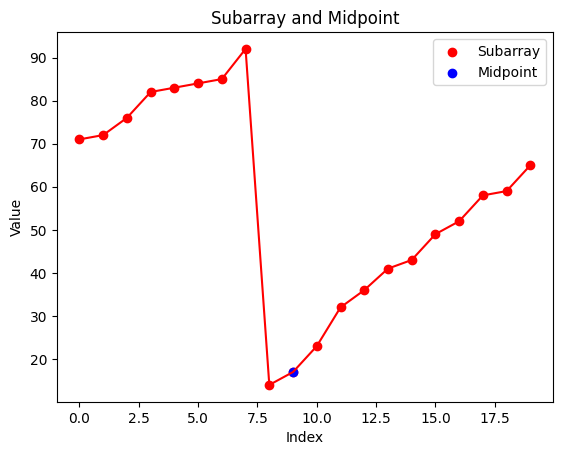

last one 2


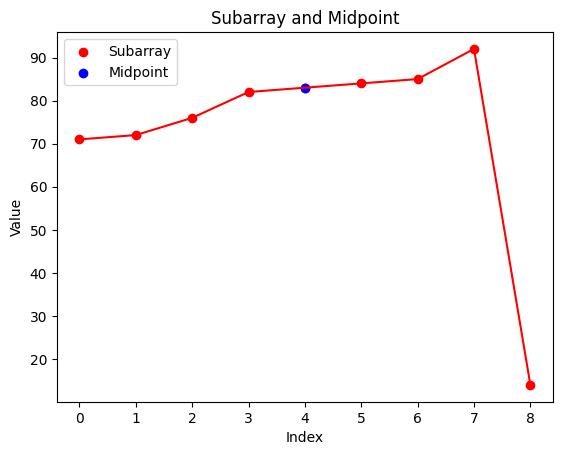

last one 1


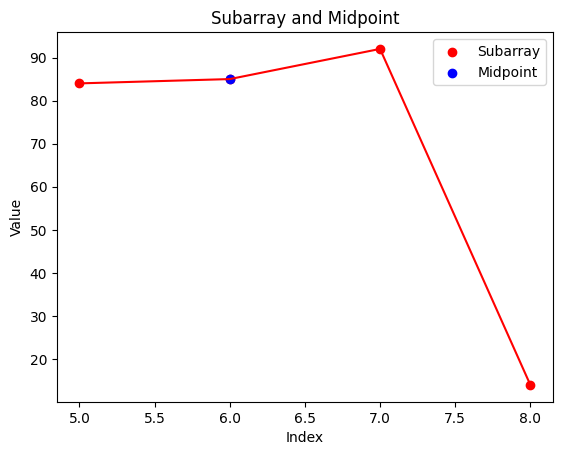

last one 1


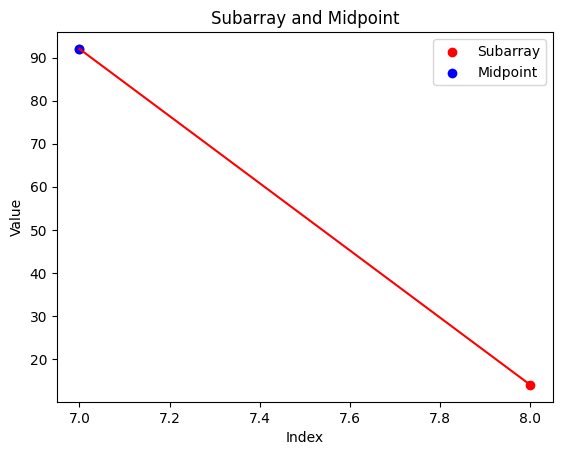

last one 2
here
14


In [399]:
import matplotlib.pyplot as plt

def findMinRotated(nums):
    l, r = 0, len(nums)-1

    while l < r:
        # Visualize the subarray
        mid = (l + r)//2

        subarray = nums[l:r+1]
        plt.scatter(range(l, r+1), subarray, color='red', label='Subarray')
        plt.plot(range(l, r+1), subarray, color='red')
        plt.scatter(mid, nums[mid], color='blue', label='Midpoint')
        plt.legend()
        plt.xlabel('Index')
        plt.ylabel('Value')
        plt.title('Subarray and Midpoint')
        plt.show()

        if nums[l] <= nums[r]:
            return nums[l]


        if nums[mid] > nums[l]:
            l = mid + 1
            print('last one 1')

        else:
            if nums[mid-1] < nums[mid]:
                r = mid - 1
                print("last one 2")
            else:
                r = mid
                print("last one 3")
        

    print("here")
    return nums[mid+1]

sorted_array = sorted(random.sample(range(100), 20))
k = random.randint(1,20)
sorted_array = sorted_array[k:] + sorted_array[:k]
print(findMinRotated(sorted_array))

# 56. Binary tree level order traversal

In [433]:
from Helper_function import Node, ListNode

import numpy as np

In [439]:
import importlib
importlib.reload(Helper_function)
from Helper_function import insert

In [451]:
random_array = np.random.choice(range(1, 101), size=9, replace=False).tolist()
tree = Node(10)

for ele in random_array:
    insert(tree,ele)
tree

Root: 10
  L--- 1
  R--- 16
    R--- 55
      L--- 25
        L--- 22
          L--- 20
        R--- 43
      R--- 91
        L--- 83

In [454]:
def inOrderTraversal(root):

    res = defaultdict(list)

    def bfs(tree,level):
        if not tree: return

        res[level].append(tree.value)

        level += 1
        bfs(tree.left,level)
        bfs(tree.right,level)

    bfs(root,0)
    return list(res.values())

    

inOrderTraversal(tree)

[[10], [1, 16], [55], [25, 91], [22, 43, 83], [20]]

# 57. Minimum number of swaps

In [455]:
# Skip

# 59. Triangle

In [484]:
def generate_triangle(n):
    l = []
    for i in range(1,n+1):
        ele = np.random.randint(1,10,size=i)
        l.append(list(ele))
    return l

exe = generate_triangle(7)
exe

[[8],
 [3, 8],
 [6, 6, 6],
 [1, 1, 2, 7],
 [7, 5, 2, 4, 6],
 [4, 6, 5, 3, 2, 2],
 [1, 5, 1, 1, 2, 8, 1]]

In [486]:
def triangle(nums):
    dp = [0] * (len(nums)+1)
    for levels in nums[::-1]:
        for i, ele in enumerate(levels):
            dp[i] = ele + min(dp[i],dp[i+1])
    return dp[0]

triangle(exe)

24

# 60. Top k frequent elements

In [543]:
exe = np.random.randint(4,size = 10)
exe

array([3, 3, 1, 1, 2, 1, 3, 0, 1, 0])

In [549]:
def topK(nums,k):

    array = [[] for i in range(len(nums)+1)]
    count = defaultdict(int)

    for ele in nums:
        count[ele] += 1
    for key, value in count.items():
        array[value].append(key)

    res = []
    for i in range(len(nums),-1,-1):
        for val in array[i]:
            if len(res) == k:
                return res
            res.append(val)


In [550]:
topK(list(exe),2)

[1, 3]

# 61. Kth largest element

In [17]:
def KthLargest(arr,k):
    # First of all if the array was sorted the results would be arr[len(arr)-k]
    # If the array was sorted in ascending = False then it would be arr[k+1]
    # We are going to do the quickselect algo with ascending = False

    def quickselect(l,r):
        pivot , p = arr[r-1], l
        for i in range(l,r):
            if arr[i] >= pivot:
                arr[p],arr[i] = arr[i],arr[p]
                p += 1
        if p  > k  : return quickselect(l,p)
        elif p  < k : return quickselect(p,r)
        else : 
            return arr[p-1]
    return quickselect(0,len(arr))

In [ ]:
# k = len(nums) - k

# def quickselect(l,r):
#     pivot, p = nums[r], l
#     for i in range(l,r):
#         if nums[i] <= pivot:
#             nums[p],nums[i] = nums[i], nums[p]
#             p += 1
#         nums[p],nums[r] = nums[r], nums[p]

#         if p > k: return quickselect(l,p-1)
#         if p < k: return quickselect(p+1,r)
#         else : return nums[p]

#     return quickselect(0,len(nums)-1)

In [21]:
test = [3,1,2,4]

KthLargest(test, 2)

3

In [22]:
def KthLargestV2(arr,k):
    arr.sort(reverse= True)
    return arr[k-1]

In [23]:
test = True
for i in range(10**4):
    array_size = random.randint(15,40)
    random_array = random.choices(range(1, 20 + 1), k=array_size)
    for j in range(1,len(random_array)+1):
        if not KthLargest(random_array,j) == KthLargestV2(random_array,j):
            test = False
    if not test:
        break

In [24]:
test

True

# 62. Minimum number of flips to make binary string alternating

In [3]:
import random

def generate_random_binary_string(length):
    binary_string = ''.join(random.choice('01') for _ in range(length))
    return binary_string

# Example usage:
random_string = generate_random_binary_string(10)
print(random_string)

0000001101


In [39]:
def minFlips(s):
    n = len(s)
    s = s + s
    alt1 = ""
    for i in range(2*n):
        alt1 += "0" if i%2 else "1"
    diff1 = 0
    for i in range(n):
        if s[i] != alt1[i]:
            diff1 += 1
    res = n
    for k in range(n,2*n):
        res = min(diff1,n-diff1,res)
        diff1 = diff1 - int(s[k-n] != alt1[k-n]) + int(s[k] != alt1[k])
    return res


In [40]:
exe = generate_random_binary_string(4)
print(exe)

minFlips(exe)

1111


2

# 63. Find first and last element in sorted array

In [44]:
def binarySearch(nums,target,left_bias):
    l,r = 0 , len(nums)-1
    i = [-1]

    while l <= r :
        m = (l+r)//2
        if nums[m] < target:
            l = m + 1
        elif nums[m] > target:
            r = m - 1
        else:
            i[0] = m
            if left_bias:
                r = m - 1
            else :
                l = m + 1
    return i[0]

def search_range(nums,target):
    left = binarySearch(nums,target,True)
    right = binarySearch(nums,target,False)
    return [left,right]

In [45]:
binarySearch(exemple,-7,False)

3

In [3]:
import numpy as np 

exemple = sorted(np.random.randint(-10,11,size = 10))

print(exemple)

exemple = [-8, -7, -7, -7, -6, -3, 1, 5, 8, 10]

exemple

[-8, -4, -2, 0, 1, 2, 7, 8, 9, 10]


In [54]:
# 64. swap pairs

In [46]:
from Helper_function import ListNode

In [129]:
import random
a = ListNode(10)
a.next = ListNode(12)
b = a

for i in range(5):
    a.next = ListNode(random.randint(0,28))
    a = a.next
print(b)

10 -> 18 -> 26 -> 6 -> 14 -> 11


In [130]:
print("Befor swaping : ", b)
def swapPairs(Node):
    dummy = ListNode(0,Node)
    prev, curr = dummy, Node

    while curr and curr.next:

        NxtPairs = curr.next.next
        second = curr.next

        second.next = curr
        curr.next = NxtPairs
        prev.next = second

        prev = curr
        curr = NxtPairs

    return dummy.next

print("After swaping : ", swapPairs(b))

Befor swaping :  10 -> 18 -> 26 -> 6 -> 14 -> 11
After swaping :  18 -> 10 -> 6 -> 26 -> 11 -> 14


# 65. Partition equal Subset Sum

In [141]:
def canPartition(nums):
    k = sum(nums)
    if k%2:
        return False
    target = k//2
    dp = {0}
    for i in range(len(nums)-1,-1,-1):
        nextDp = set()
        for t in dp:
            nextDp.add(t)
            nextDp.add(t+nums[i])
        dp = nextDp
        print(dp)
    return True if target in dp else False 

canPartition([1,5,11,5])

{0, 5}
{0, 16, 11, 5}
{0, 5, 10, 11, 16, 21}
{0, 1, 5, 6, 10, 11, 12, 16, 17, 21, 22}


True

# 66. Search A 2D Matrix

In [152]:
matrix = np.sort(np.random.randint(1,50,size=12))
matrix = matrix.reshape((4,3))
matrix

array([[ 5,  7,  7],
       [ 9, 11, 21],
       [24, 31, 32],
       [39, 45, 45]])

In [160]:
def searchMatrix(mat,target):
    ROWS, COLS = len(mat), len(mat[0])

    top, bot = 0, ROWS -1 
    while top <= bot:
        row = (top+bot)//2
        if target > mat[row][-1]:
            top = row + 1
        elif target < mat[row][0]:
            bot = row - 1
        else:
            break
    
    if not(top <= bot):
        return False
    
    l,r = 0, COLS - 1
    while l<= r:
        m = (l+r)//2
        if target > mat[row][m] :
            l = m + 1
        elif target < mat[row][m]:
            r = m - 1
        else:
            return True
        
    return False


searchMatrix(matrix,24)

True

# 67. Good Node

In [413]:
import importlib
importlib.reload(Helper_function)
from Helper_function import Root

<module 'Helper_function' from '/Users/badremhiouah/Desktop/Python/Leetcode_Problems/Helper_function.py'>

In [212]:
a = Root(5)
for i in range(7):
    a.insert(random.randint(1,10))
a

Root: 5
  L--- 3
  R--- 7
    R--- 10
      L--- 9

In [213]:
a = Root(3)
a.left = Root(1)
a.left.left = Root(3)
a.right = Root(4)
a.right.right = Root(5)
a.right.left = Root(1)
a

Root: 3
  L--- 1
    L--- 3
  R--- 4
    L--- 1
    R--- 5

In [219]:
def CountgoodNode(root):
    count = 0

    def dfs(root,maxi):
        nonlocal count
        if not root:
            return
        if root.val < maxi:
            dfs(root.left,maxi)
            dfs(root.right,maxi)
        else:
            maxi = max(maxi, root.val)
            count += 1
            dfs(root.left,maxi)
            dfs(root.right,maxi)
    maxi = -float('inf')
    dfs(root,maxi)
    return count


CountgoodNode(b)

5

In [214]:
a = [-1,5,-2,4,4,2,-2,"null","null",-4,"null",-2,3,"null",-2,0,"null",-1,"null",-3,"null",-4,-3,3,"null","null","null","null","null","null","null",3,-3]
b = []
for ele in a:
    try:
        ele = int(ele)
        b.append(ele)
    except:
        b.append(None)

b = Root.build_tree_from_list(b)

# 68. Insert Interval

In [ ]:
def insertinterval(intervals, new_inter ):
    res = []
    for i in range(intervals):
        if new_inter[0] > intervals[i][1]:
            res.append(intervals[i])
        elif new_inter[1] < intervals[i][0]:
            res.append(new_inter)
            return res + intervals[i:] 
        else:
            new_inter = [min(new_inter[0],intervals[i][0]), max(new_inter[1],intervals[i][1])]
    res.append(new_inter)
    return res




# 69. Perfect Squares

In [242]:
# the question is how many perfect square do we need to sum up to the number given

def PerfecSquare(num):
    # The worst that can be done is n (as 1^2 is equal to 1)
    dp = [num]*(num+1)
    dp[0] = 0
    for i in range(1, num+1):
        for k in range(i-1,0,-1):
            if k**2 > i:
                continue
            else:
                dp[i] = min(dp[i], dp[i-k**2] + 1)

    return dp


PerfecSquare(5)


[0, 5, 5, 5, 1, 2]

# 71. Graph valid tree

In [270]:
def graphValidTree(n,adj):

    neigh = {i:[] for i in range(n)}
    for a,b in adj:
        neigh[a].append(b)
        neigh[b].append(a)
    visited = set()
    prev = []
    end = False
    def dfs(k,prev):
        nonlocal end
        if end:
            return
        if k in visited:
            end = True
            return 
        visited.add(k)
        for ele in neigh[k]:
            if ele not in prev:
                dfs(ele,[k])

    dfs(0,prev)
    return not end and len(visited)==n


In [271]:
exemple = [[0,1],[0,2],[0,3],[1,4]]
graphValidTree(5,exemple)

True

In [269]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(n,edges):
    # Create an undirected graph
    G = nx.Graph()

    G.add_nodes_from(range(n))
    
    # Add edges to the graph
    G.add_edges_from(edges)
    
    # Draw the graph
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)  # positions for all nodes
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=16, font_color='black', edge_color='gray')
    
    # Show the plot
    plt.show()


True


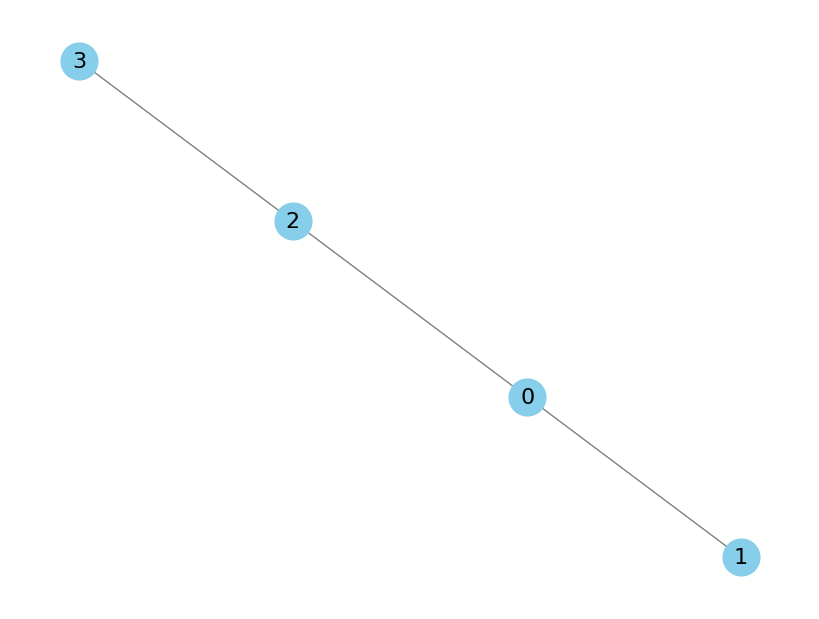

In [389]:
def generate_random_edge_list(num_nodes, num_edges):
    # Ensure the number of edges does not exceed the maximum possible for an undirected graph
    max_edges = num_nodes * (num_nodes - 1) // 2
    if num_edges > max_edges:
        raise ValueError(f"Too many edges. Maximum possible edges for {num_nodes} nodes is {max_edges}.")

    # Initialize an empty set to store unique edges
    edges = set()
    while len(edges) < num_edges:
        u = random.randint(0, num_nodes - 1)
        v = random.randint(0, num_nodes - 1)
        
        # Ensure no self-loops and no duplicate edges (for undirected graph, (u, v) is same as (v, u))
        if u != v and (u, v) not in edges and (v, u) not in edges:
            edges.add((u, v))

    # Convert the set of edges to a list of tuples
    edge_list = list(edges)
    
    return edge_list

# Example usage
num_nodes = 4
num_edges = 3
edge_list = generate_random_edge_list(num_nodes, num_edges)

print(graphValidTree(num_nodes,edge_list))
visualize_graph(num_nodes, edge_list)


In [385]:

def dijkstra(graph, start):
    heap = [(0,start)]
    distances = {start:0}
    visited = set()

    while heap:
        current_distance, current_node = heapq.heappop(heap)

        if current_node in visited:
            continue

        visited.add(current_node)

        for neigh, dist in graph[current_node]:
            distance = current_distance + dist
            if neigh not in distances or distance < distances[neigh]:
                distances[neigh] = distance 
                heapq.heappush(heap,(distance,neigh))

    return distances
    

# Example usage:
graph = {
    'A': [('B', 1), ('C', 4)],
    'B': [('A', 1), ('C', 2), ('D', 5)],
    'C': [('A', 4), ('B', 2), ('D', 1)],
    'D': [('B', 5), ('C', 1)]
}

start_node = 'A'
distances = dijkstra(graph, start_node)
print(distances)


{'A': 0, 'B': 1, 'C': 3, 'D': 4}


# 72. Network delay times

In [398]:
def networkDelays(num, edge_weight, start):
    neigh = {i:[] for i in range(1,num+1)}
    print(neigh)
    for u,v,w in edge_weight:
        neigh[u].append((w,v))
    heap = [(0,start)]
    t = 0
    visited = set()

    while heap:
        curr_dist, curr_node = heapq.heappop(heap)

        if curr_node in visited:
            print("we here")
            continue

        visited.add(curr_node)
        t = max(t,curr_dist)

        for weight, ele in neigh[curr_node]:
            if ele not in visited:
                heapq.heappush(heap,(weight+ curr_dist,ele))

    return t if len(visited) == num else -1



exemple = ["211","231","341"]
exemple = [list(ele) for ele in exemple]
matrix_int = [[int(element) for element in row] for row in exemple]


networkDelays(4,matrix_int,2)




{1: [], 2: [], 3: [], 4: []}


2

# 73. Maximum Alternating Subsequence

In [403]:
def Max_altern_sub(nums):
    max_odd , max_even = nums[0],0
    for i in range(1,len(nums)):
        temp = max_even
        max_odd = max(max_odd, nums[i] + temp)
        max_even = max(max_even, max_odd - nums[i])

    return max_odd


In [404]:
# 74. House Robber

In [420]:
import importlib
importlib.reload(Helper_function)
from Helper_function import Root

In [421]:
def houseRobber(houses):

    def dfs(root):
        if not root:
            return [0,0]
        
        left_pairs = dfs(root.left)
        right_pairs = dfs(root.right)

        with_root = root.val + left_pairs[1] + right_pairs[1]
        without_root = max(left_pairs) + max(right_pairs)

        return [with_root,without_root]
    
    return max(dfs(houses))


house = [4,1,None,2,None,3]

house = Root.build_tree_from_list(house)
print(house)

houseRobber(house)


    

Root: 4
  L--- 1
    L--- 2



6

# 75. Decode String

In [425]:
def decode(s):
    stack = []

    for ele in s:
        if ele != "]":
            stack.append(ele)
        else :
            sub = ""
            while stack and stack[-1] != "[":
                sub = stack.pop() + sub
            stack.pop()
            k = ""
            while stack and stack[-1].isdigit():
                k = stack.pop() + k

            stack.append(int(k)*sub)

    return "".join(stack)


a = "3[ab2[c]]"
decode(a)



'abccabccabcc'

# 78. Frequency of the most frequent element

In [437]:
exemple = [3,9,6]
k = 2


def freqcyMostfreq(nums, k):

    nums.sort()
    
    if len(nums) == 0:
        return 0
    
    l,r = 0, 0
    windowlen = 1
    total = nums[0]
    res = 0

    while r < len(nums):
        while nums[r]* windowlen <= total + k:
            r += 1
            res = max(res,windowlen)
            if r == len(nums):
                break
            total += nums[r]
            windowlen += 1
        while r < len(nums) and not nums[r]* windowlen <= total + k:
            total -= nums[l]
            l += 1
            windowlen -= 1
    return res


freqcyMostfreq(exemple,2)


1

# 78. Maximum Subarray Min-product

In [442]:
def maxSubMinProduct(nums):

    stack = []
    res = 0
    prefixe = [0]
    for ele in nums:
        prefixe.append(prefixe[-1]+ ele)

    for i,n in enumerate(nums):
        newstart = i
        while stack and stack[-1][1] > n:
            start, val = stack.pop()
            total = prefixe[i] - prefixe[start]
            res = max(total*val,res)
            newstart = start

        stack.append((newstart,n))

    while stack:
        start,val = stack.pop()
        total = prefixe[-1] - prefixe[start]
        res = max(total*val,res)

    return res

# 79. Jump game VII

In [466]:
from collections import deque

In [452]:
def canReach(s,minjump,maxjump):
    visited = set()
    def bfs(index):
        if index == len(s)-1 and s[index]== '0':
            visited.add(index)
            return
        
        if s[index] == '0':
            visited.add(index)
            for i in range(index+minjump,index+maxjump+1):
                if i < len(s) and i not in visited and s[i]=='0':
                    bfs(i)
    bfs(0)  
    return len(s)-1 in visited

s = "011010"
minjump = 2
maxjump = 3

canReach(s,minjump,maxjump)

True

In [470]:
def canReach(s,minJump,maxJump):
    q = deque([0])
    farthest = 0

    while q:
        index = q.popleft()
        start = max(index+minJump,farthest)
        for ele in range(start, min(len(s),index+maxJump+1)):
            if s[ele]=='0':
                if ele == len(s)-1:
                    return True
                q.append(ele)

        farthest = ele

    return False

s = "011010"
minjump = 2
maxjump = 3

canReach(s,minjump,maxjump)

True

# 81. Combination Sum II

In [481]:
def combSumII(candidates,target):

    candidates.sort()
    res = []
    stack = []
    print(candidates)
    def backtrack(pos,target):
        if target == 0:
            res.append(stack.copy())
        if target <= 0:
            return
        
        prev = -1
        for i in range(pos,len(candidates)):
            if candidates[i] == prev:
                continue
            stack.append(candidates[i])
            backtrack(i+1,target-candidates[i])
            stack.pop()
            prev = candidates[i]
        
    backtrack(0,target)
    return res


exemple = [10, 1, 2, 7, 6,1, 5]

target = 8

combSumII(exemple,target)

[1, 1, 2, 5, 6, 7, 10]


[[1, 1, 6], [1, 2, 5], [1, 7], [2, 6]]

# 82. Combination Sum

In [484]:
def combSumVII(nums,target):

    dp = {0:1}

    for i in range(1,target+1):
        dp[i] = 0
        for ele in nums:
            dp[i] += dp.get(i-ele,0)

    return dp

combSumVII([1,2,3],4)


{0: 1, 1: 1, 2: 2, 3: 4, 4: 7}

# 84. Sort List

In [519]:
a = ListNode()
a.next = ListNode(2)
a.next.next = ListNode(3)
a.next.next.next = ListNode(4)

print(a)


0 -> 2 -> 3 -> 4


In [537]:
a = ListNode()
a.next = ListNode(2)
a.next.next = ListNode(3)
a.next.next.next = ListNode(4)

def split(head):
    slow,fast = head,head.next
    left = slow
    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next
    # right = ListNode(0,slow.next)
    right = slow.next
    print("myright", right)
    slow.next = None
    print("myright", right)
    
    return left,right


y,z = split(a)
print(y)
print(z)

myright 3 -> 4
myright 3 -> 4
0 -> 2
3 -> 4


# 85. Process tasks using servers

In [1]:
# Skip

# 86. Single Threaded CPU

In [4]:
import heapq
def SinglethreadCPU(tasks):

    for i,t in enumerate(tasks):
        t.append(i)

    minHeap = []
    res = []
    time = tasks[0][0]
    i = 0

    while minHeap or i < len(tasks):
        while i < len(tasks) and time >= tasks[i][0]:
            heapq.heappush(minHeap, [tasks[i][1],tasks[i][2]])
            i += 1
        if minHeap:
            procTime, index = heapq.heappop(minHeap)
            time += procTime
            res.append(index)
        else:
            time = tasks[i][0]
    return res

exemple = [[1,2],[2,4],[3,2],[4,1]]
SinglethreadCPU(exemple)

[0, 2, 3, 1]

# 87. Redundant Cycle in graph: Union Find

In [13]:
def FindCycle(edges):
    par = [i for i in range(len(edges) + 1)]
    rank = [1]*(len(edges)+1)

    def find(n):
        p = par[n]
        while p != par[p]:
            p = par[par[p]]
        return p
    
    def union(n1,n2):
        p1 = find(n1)
        p2 = find(n2)
        if p1 == p2:
            return False
        if rank[p1] > rank[p2]:
            rank[p1] += rank[p2]
            par[n2] = p1
        else:
            rank[p2] += rank[p1]
            par[n1] = p2
        return True

    for a,b in edges:
        if not union(a,b):
            return [a,b]
        

exemple = [[1,2],[2,3],[3,1]]
FindCycle(exemple)

[3, 1]

# 88. Number of subsequence that satisfy min+ max <= target

In [31]:
def NumSubCond(nums,target):
    nums.sort()

    l,r = 0, len(nums)-1
    res = 0

    while l <= r:   
        while r>=0 and nums[l] + nums[r] > target:
            r -= 1
        if r>= l:
            res += 1 << (r-l)
            l+= 1

    return res 

NumSubCond([1],1)

0 0


0

# 89. Daily temperatures

In [31]:
import heapq
def DailyTemp(nums):
    n = len(nums)
    stack = []
    i = 0
    temp = nums[0]
    res = [0 for i in range(n)]

    while i < n:
        while i < n and nums[i] <= temp:
            stack.append([i,nums[i]])
            temp = nums[i]
            i += 1


        while i<n and stack and stack[-1][1] < nums[i]:
            print(stack, nums[i])
            rank, new_temp = stack.pop()
            res[rank] = i - rank

        if i < n:    
            temp = nums[i]

    return res

     


exemple = [73,74,75,71,69,72,76]

DailyTemp(exemple)


[[0, 73]] 74
[[1, 74]] 75
[[2, 75], [3, 71], [4, 69]] 72
[[2, 75], [3, 71]] 72
[[2, 75], [5, 72]] 76
[[2, 75]] 76


[1, 1, 4, 2, 1, 1, 0]

In [46]:
def paintHouses(houses):

    dp = [[0,0,0]]

    for i,house in enumerate(houses):
        dp.append([house[0]+ min(dp[-1][1],dp[-1][2]),house[1]+ min(dp[-1][0],dp[-1][2]),house[2]+ min(dp[-1][0],dp[-1][1])])

    return min(dp[-1])
        

exemple = [[17,2,17],[16,16,5],[14,3,19]]
paintHouses(exemple)
    

10

In [67]:
from collections import defaultdict
def countpalindromlen3(s):
    
    place = defaultdict(list)
    res = 0

    for i,ele in enumerate(s):
        if ele not in place:
            place[ele].append(i)
        elif ele in place and len(place[ele])==1:
            place[ele].append(i)
        else:
            place[ele][-1]=i

    for ele in place:
        if len(place[ele])==2:

            res += len(set(s[place[ele][0]+1:place[ele][1]]))
    
    return res

countpalindromlen3("ckafnafqo")
        


[0, 1, 2, 3, 4, 5, 5, 5, 6, 7]
{'c': [0], 'k': [1], 'a': [2, 5], 'f': [3, 6], 'n': [4], 'q': [7], 'o': [8]}


4

In [72]:
a = "dfizdih"
a[:len(a)-1]

'dfizdi'

In [77]:
def splitstring(s):
    def dfs(index,prev):
        if index == len(s):
            return True

        for i in range(index,len(s)):
            val = int(s[index:i+1])
            if val + 1 == prev and dfs(i+1,val):
                return True
        return False


    for j in range(len(s)-1):
        val = int(s[:j+1])
        if dfs(j+1,val): return True
    return False


splitstring("432110")

False

In [78]:
def minimumPathSum(mat):
    rows, cols = len(mat), len(mat[0])

    for i in range(rows-1):
        mat[i+1][0] = mat[i][0] + mat[i+1][0]
    for j in range(cols-1):
        mat[0][j+1] = mat[0][j+1] + mat[0][j]

    for i in range(1,cols):
        for j in range(1,rows):
            mat[i][j] = mat[i][j] + min(mat[i-1][j],mat[i][j-1])

    return mat[-1][-1]


mat_exemle = [[1,3,1],[1,5,1],[4,2,1]]

minimumPathSum(mat_exemle)
            

7

In [83]:
def minPathSum(grid):
    rows, cols = len(grid), len(grid[0])

    for i in range(rows-1,-1,-1):
        for j in range(cols-1,-1,-1):
            if j == cols-1 and i == rows-1:
                continue
            elif j == cols-1:
                grid[-1][j] = grid[i][j] + grid[-1][j]
            elif i == rows-1 and j < cols-1:
                grid[-1][j] = grid[i][j] + grid[-1][j+1]
            else :
                grid[-1][j] = grid[i][j] + min(grid[-1][j],grid[-1][j+1])
        print(grid[-1])

    return grid[-1][0]

grid = [[1,2,3],[4,5,6]]
minPathSum(grid)

[15, 11, 6]
[12, 11, 9]


12

In [100]:
import random

def sortColors(nums):

    l,r = 0, len(nums)-1
    i = 0 

    while i <= r:
        if nums[i] == 0:
            nums[l],nums[i] = nums[i], nums[l]
            l+= 1
        elif nums[i] == 2:
            nums[r],nums[i] = nums[i], nums[r]
            r -= 1
            i -= 1
        i += 1

    return


exemple = [ random.randint(0,2) for i in range(9)]
print("before sort", exemple)
sortColors(exemple)
print("after sort", exemple)

before sort [2, 1, 0, 2, 1, 0, 2, 0, 2]
after sort [0, 0, 0, 1, 1, 2, 2, 2, 2]


0 0
3 1
6 2


True

In [ ]:
def MaximumRemovable(s,p,removable):
    def isSubseq(s,p):
        i1,i2 = 0,0
        while i1 < len(s) and i2 < len(p):
            if s[i1] == p[i2] and i1 not in removed:
                i2 += 1
            i1 += 1
            if i2 == len(p):
                return True
        return False
    
    # Binary search on removable
    l,r = 0, len(removable)-1
    while l <= r:
        m = (l+r)//2
        removed = set(removable[:m])
        if isSubseq(s,p):
            l = m + 1
        else:
            r = m -1

    return m


In [146]:
def maxCardPoints(cardPoints,k):
    l,r = 0, len(cardPoints)-k
    total = sum(cardPoints[r:])
    res = total

    while l < k:
        total += (cardPoints[l] - cardPoints[r])
        res = max(res,total)
        l += 1
        r += 1
    return res


nums = [96,90,41,82,39,74,64,50,30]
k = 8
maxCardPoints(nums,k)


0
1
2
3
4
5
6
7


536

In [196]:
def coinChange(coins,amount):
    # first the recursive solution with the cache

    cache = {}

    def dfs(index,curramount):
        if curramount > amount:
            return 0
        if (index,curramount) in cache:
            return cache[(index,curramount)]
        if index == len(coins):
            return 0
        if curramount == amount:
            return 1
        # print(cache)
        cache[(index,curramount)] = dfs(index, curramount + coins[index]) + dfs(index+ 1,curramount)
        return cache[(index,curramount)]

    return dfs(0,0)

    
coins = [1,2,5]
amount = 9
coinChange(coins,amount)

8

In [199]:
def coinChangedp(coins,amount):
    dp = [[0]*(len(coins)+1) for i in range(amount+1)]
    dp[0] = [1]*(len(coins)+1)

    for a in range(1,amount+1):
        for i in range(len(coins)-1,-1,-1):
            dp[a][i] = dp[a][i+1]
            if a - coins[i] >= 0:
                dp[a][i] += dp[a - coins[i]][i]
    for ele in dp[:-1]:
        print(ele)
    return dp[amount][0]

coinChangedp(coins,amount)

[1, 1, 1, 1]
[1, 0, 0, 0]
[2, 1, 0, 0]
[2, 0, 0, 0]
[3, 1, 0, 0]
[4, 1, 1, 0]
[5, 1, 0, 0]
[6, 1, 0, 0]
[7, 1, 0, 0]


8

In [205]:
def coinchangedpopt(coins, amount):
    dp=[0]*(amount+1)
    dp[0] = 1
    print(dp)
    for coin in coins:
        for i in range(1, amount+1):
                if i - coin >=0:
                    dp[i] += dp[i-coin]
        print(dp)
    return dp[-1]

coinchangedpopt(coins,amount)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 2, 2, 3, 3, 4, 4, 5, 5]
[1, 1, 2, 2, 3, 4, 5, 6, 7, 8]


8

In [211]:
def myPow(x,n):
    def helper(x,n):
        print(x,n)
        if n == 0: return 1
        if n == 1: return x
        if x == 0: return 0
        res = helper(x*x,n//2)
        # print(res)
        return x*res if n%2 else res
    return helper(x,n)

myPow(2,10)


2 10
4 5
16 2
256 1


1024

In [217]:
import math
directions = [[round(math.cos(math.pi / 4 * k)), round(math.sin(math.pi / 4 * k))] for k in range(8)]
directions

[[1, 0], [1, 1], [0, 1], [-1, 1], [-1, 0], [-1, -1], [0, -1], [1, -1]]

In [230]:
def findBinaryStrings(nums):

    mySet = {s for s in nums}

    def backtrack(i,cur):
        if i == len(nums):
            res = "".join(cur)
            return None if res in mySet else res
        
        res = backtrack(i+1,cur)
        if res:
            print("left",res,cur,i) 
            return res

        cur[i] = "1"
        res = backtrack(i+1,cur)
        if res: 
            print("right",res,cur,i)
            return res

    return backtrack(0, ["0" for s in range(len(nums))])

nums = ["001","000","110"]
findBinaryStrings(nums)

left 011 ['0', '1', '1'] 2
right 011 ['0', '1', '1'] 1
left 011 ['0', '1', '1'] 0


'011'

In [269]:
def minCostconnectPoints(points):
    visited = set()
    to_visit = [[float("inf"),i] for i in range(1,len(points))]
    elements = 0
    res = 0
    for i in range(len(points)-1):
        visited.add(elements)
        for point in to_visit:
            old_dist,ele = point[0],point[1]
            new_dist = abs(points[elements][0]-points[ele][0]) + abs(points[elements][1]-points[ele][1])
            if new_dist < old_dist:
                point[0] = new_dist
        heapq.heapify(to_visit)
        dist,elements = heapq.heappop(to_visit)
        res += dist
    return res


points = [[0,0],[1,1],[1,0],[-1,1]]
minCostconnectPoints(points)


4

In [280]:
def solution(A, F, M):
    stack = []
    def backtrack(total, i):
        if total == 0 and i == 0:
            return stack[:]
        if total < 0 or i < 0:
            return
        
        avg = total//i
        for num in range(avg, 7):
            stack.append(num)
            res = backtrack(total - num, i - 1)
            if res:
                print(res)
                return res
            stack.pop()

    def is_possible(A, M, F):
        tot1 = sum(A)
        N = len(A) + F
        tot2 = M*N - tot1 
        if tot2 > 6 * F:
            return False
        res = backtrack(tot2, F)
        if res: 
            return res
        else: 
            return False

    return is_possible(A,M,F)


In [282]:
A = [1, 2, 3, 4]
F = 4
M = 6

solution(A,F,M)

False

In [331]:
def solution(A, X, Y, Z):
    station = [["X",X,0],["Y",Y,0],["Z",Z,0]]
    time = 0
    def is_possible_fill(car,station,now=False):
        for ele in station:
            if ele[1] >= car:
                if not now:
                    return True
                else:
                    if ele[2] == 0:
                        return True
        return False

    while A and is_possible_fill(A[0],station):
        i = 0
        while not is_possible_fill(A[0],station,now = True):
            time_to_wait = sorted([sublist[2] for sublist in station])[i]
            i += 1
            time += time_to_wait
            for ele in station:
                ele[2] -= time_to_wait
                ele[2] = max(0,ele[2])
        
        while A and  is_possible_fill(A[0],station,now = True):
            car = A.pop(0)
            for ele in station:
                if ele[1] >= car and ele[2] == 0:
                    ele[1] -= car
                    ele[2] += car
                    break
        
    if len(A) == 0:
        return time
    else:
        return -1

In [332]:
exemple = ([2, 8, 4, 3, 2], 7, 11, 3)
solution(*exemple)

8

In [354]:
X =[1, 4, 3, 2, 3]
Y =[4, 3, 1, 1, 2]
dico = {i:point for i,point in enumerate(zip(X,Y))}

print(dico)

{0: (1, 4), 1: (4, 3), 2: (3, 1), 3: (2, 1), 4: (3, 2)}


In [358]:
def is_outside(triplet,point):
        x, y = point
        x1, y1 = triplet[0]
        x2, y2 = triplet[1]
        x3, y3 = triplet[2]
        side_1 = (x - x2) * (y1 - y2) - (x1 - x2) * (y - y2)
        side_2 = (x - x3) * (y2 - y3) - (x2 - x3) * (y - y3)
        side_3 = (x - x1) * (y3 - y1) - (x3 - x1) * (y - y1)
        area = abs((x1*(y2 - y3) + x2*(y3 - y1) + x3*(y1 - y2)))
        return not (side_1 < 0.0) == (side_2 < 0.0) == (side_3 < 0.0) and not area == 0

is_outside([dico[0],dico[1],dico[3]],dico[4])

True

In [511]:
X = (1,2)
print(*X,*X)

1 2 1 2


In [528]:
from itertools import combinations, permutations

def solution(X, Y):
    def area(x1,y1,x2,y2,x3,y3):
        return abs((x1*(y2 - y3) + x2*(y3 - y1) + x3*(y1 - y2)))
    def is_outside(triplet,point):
        x, y = point
        x1, y1 = triplet[0]
        x2, y2 = triplet[1]
        x3, y3 = triplet[2]
        side_1 = (x - x2) * (y1 - y2) - (x1 - x2) * (y - y2)
        side_2 = (x - x3) * (y2 - y3) - (x2 - x3) * (y - y3)
        side_3 = (x - x1) * (y3 - y1) - (x3 - x1) * (y - y1)
        tri_area = abs((x1*(y2 - y3) + x2*(y3 - y1) + x3*(y1 - y2)))

        if tri_area == 0:
            return False
        to_check = list(combinations([0,1,2],2))
        for a,b in to_check:
            x1,y1 = triplet[a]
            x2,y2 = triplet[b]
            if area(x1,y1,x2,y2,x,y) == 0 and min(x1,x2)<=x<=max(x1,x2) and min(y1,y2)<=y<=max(y1,y2):
                return False
        return not (side_1 < 0.0) == (side_2 < 0.0) == (side_3 < 0.0)

    dico = {i:point for i,point in enumerate(zip(X,Y))}
    
    triangles = list(combinations([i for i in range(len(X))], 3))    

    for triangle in triangles:
        p1, p2, p3 = triangle
        valid_triangle = True
        for point_index, point_coords in dico.items():
            if point_index not in triangle:  # skip the triangle points themselves
                if not is_outside([dico[p1], dico[p2], dico[p3]], point_coords):
                    valid_triangle = False
                    break
        if valid_triangle:
            return (dico[p1], dico[p2], dico[p3])

    return []

In [530]:
import matplotlib.pyplot as plt
from itertools import combinations

def plot_triangle(x_coords, y_coords):
    # Scatter plot all points
    plt.figure(figsize=(8, 6))
    plt.scatter(x_coords, y_coords, color='blue', label='Points')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Scatter Plot of Points')
    plt.grid(True)
        
    # Find a triangle without any other points inside it
    triangle = solution(x_coords,y_coords)
    
    if triangle:
        # Plot the triangle as a line plot
        triangle_x = [point[0] for point in triangle]
        triangle_y = [point[1] for point in triangle]
        triangle_x.append(triangle_x[0])  # closing the loop
        triangle_y.append(triangle_y[0])  # closing the loop
        
        plt.plot(triangle_x, triangle_y, color='red', marker='o', linestyle='-', linewidth=2, markersize=8)
        plt.scatter(triangle_x[:-1], triangle_y[:-1], color='red', label='Triangle Vertices')
        plt.legend()
    
    plt.show()

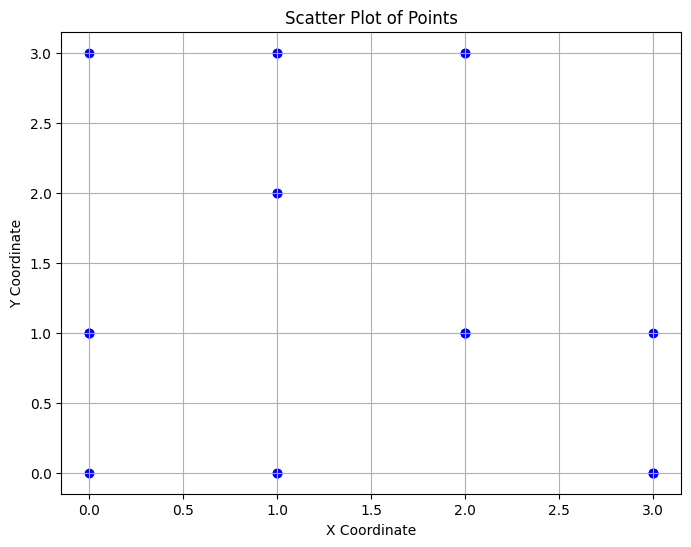

In [572]:
import numpy as np
def generate_random_points(num_points, range_min, range_max):
    x_coords = np.random.randint(range_min, range_max, num_points)
    y_coords = np.random.randint(range_min, range_max, num_points)
    return x_coords, y_coords

# Generate 10 random points with coordinates ranging from 0 to 10
x_coords, y_coords = generate_random_points(20, 0, 4)

plot_triangle(x_coords,y_coords)

In [535]:
print(x_coords)
print(y_coords)

[2 2 1 0 0 1 2 1 0 0 3 2 1 2 2 3 1 1 0 3]
[0 0 0 2 1 3 2 3 1 2 1 1 2 2 1 0 2 2 3 2]


In [479]:
from collections import Counter
def plot_points_with_duplicates(x_coords, y_coords):
    points = list(zip(x_coords, y_coords))
    point_counts = Counter(points)
    
    colors = {1: 'blue', 2: 'green', 3: 'red'}
    color_list = [colors[min(point_counts[p], 3)] for p in points]

    plt.figure(figsize=(8, 6))
    plt.scatter(x_coords, y_coords, c=color_list, s=100, edgecolors='black', alpha=0.7)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Scatter Plot of Points with Duplicate Counts')
    plt.grid(True)
    plt.show()

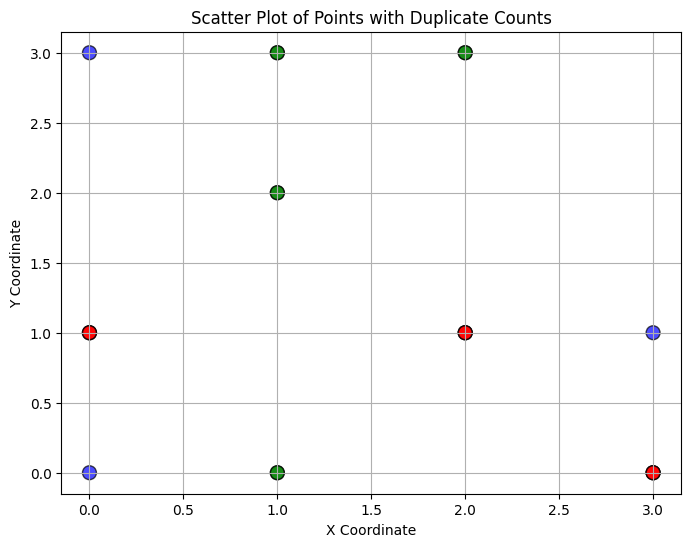

In [573]:
plot_points_with_duplicates(x_coords,y_coords)